# Act2/Part2

Librerias a utilizar

In [27]:
import nltk
import ssl
import pandas as pd

Base de datos a utilizar

In [40]:
pr = pd.read_csv("/home/mata/Documentos/mineria/rev-solo.csv")
pr.tail(10)

,Aromas include tropical fruit broom brimstone and dried herb. The palate isn't overly expressive offering unripened apple citrus and dried sage alongside brisk acidity.,Italy,White Blend
129962,Intense aromas of wild cherry baking spice til...,Italy,Frappato
129963,Blackberry cassis grilled herb and toasted aro...,Italy,Nero d'Avola
129964,A bouquet of black cherry tart cranberry and c...,Israel,Cabernet Sauvignon
129965,Initially quite muted this wine slowly develop...,France,Gewürztraminer
129966,While it's rich this beautiful dry wine also o...,France,Pinot Gris
129967,Notes of honeysuckle and cantaloupe sweeten th...,Germany,Riesling
129968,Citation is given as much as a decade of bottl...,US,Pinot Noir
129969,Well-drained gravel soil gives this wine its c...,France,Gewürztraminer
129970,A dry style of Pinot Gris this is crisp with s...,France,Pinot Gris
129971,Big rich and off-dry this is powered by intens...,France,Gewürztraminer


Se pueden ver las palabras mas repetidas 

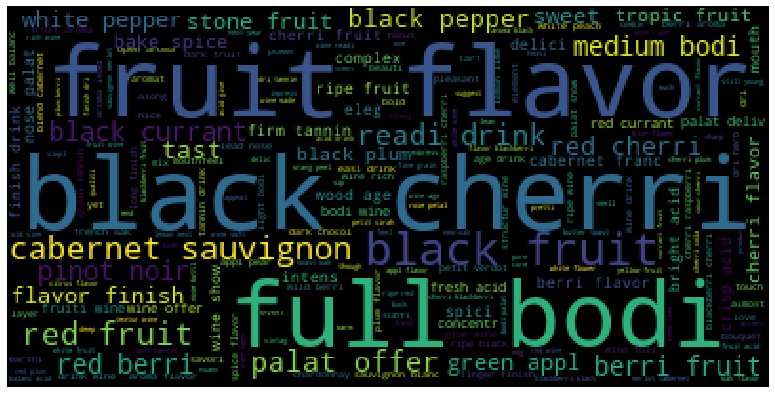

In [31]:
pr.columns = ['description', 'country', 'variety']
n = len(pr)
spa = stopwords.words("english")
stemmer = SnowballStemmer('english')
tokenizer = RegexpTokenizer(r'\w+') # para eliminar puntuación
reemplazos = []
for r in range(n):
    original = pr.description[r]
    reemplazo = ''
    if original != 'NaN':
        quedar = [stemmer.stem(p) for p in tokenizer.tokenize(original) if p.lower() not in spa]
        reemplazo = ' '.join(quedar)
    reemplazos.append(reemplazo)
pr['limpios'] = reemplazos
texto = ' '.join(reemplazos)
nube = WordCloud().generate(texto)
plt.rcParams["figure.figsize"] = [15, 7]
plt.imshow(nube)
plt.axis("off")
plt.show()

Ahora, para separar los datos, se hacen 3 archivos csv diferentes, con tres de los países que se encuentran en la columna 'country'. Estos fueron elegidos porque fueron los ultimos de la tabla. Los nombres son 'Italy', 'Israel' y 'France'.

In [41]:
header = ['description','country',  'variety']
writer = e[e['country'] == 'Italy']
writer.to_csv('Italy-wine.csv', columns = header, index=False)

lol = pd.read_csv('Italy-wine.csv')
lol.head(4)

,description,country,variety
0,"Elegance, complexity and structure come togeth...",Italy,Friulano
1,"Underbrush, scorched earth, menthol and plum s...",Italy,Sangiovese
2,"Forest floor, tilled soil, mature berry and a ...",Italy,Sangiovese
3,"Aromas of forest floor, violet, red berry and ...",Italy,Sangiovese


In [42]:
header = ['description','country',  'variety']
writer = e[e['country'] == 'Israel']
writer.to_csv('Israel-wine.csv', columns = header, index=False)

lol = pd.read_csv('Israel-wine.csv')
lol.head(4)

,description,country,variety
0,"Dark red violet in color, this wine has aromas...",Israel,Cabernet Sauvignon
1,Restrained aromas of black plum barely set the...,Israel,Cabernet Sauvignon
2,A clean nose of citrus paves the way for flavo...,Israel,Chardonnay
3,"This wine is dark red-violet color to the eye,...",Israel,Cabernet Sauvignon


In [43]:
header = ['description','country',  'variety']
writer = e[e['country'] == 'France']
writer.to_csv('France-wine.csv', columns = header, index=False)

lol = pd.read_csv('France-wine.csv')
lol.head(4)

,description,country,variety
0,"This is the top wine from La Bégude, named aft...",France,Provence red blend
1,This wine is in peak condition. The tannins an...,France,Tannat
2,Coming from a seven-acre vineyard named after ...,France,Malbec
3,"Pale in color, this is nutty in character, wit...",France,Sparkling Blend


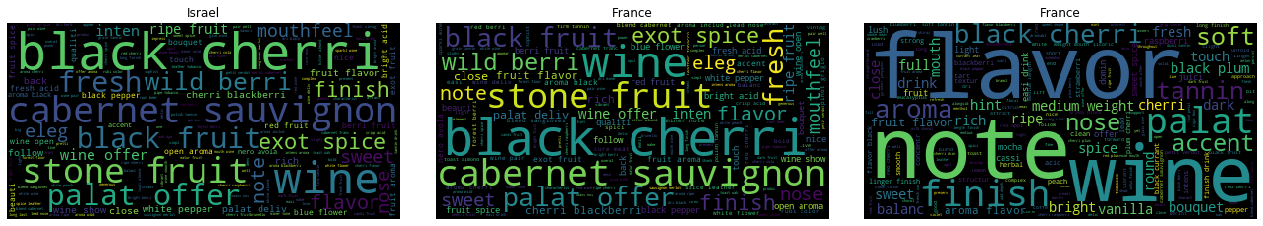

In [44]:
import ssl
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.tokenize import RegexpTokenizer

if getattr(ssl, '_create_unverified_context', None):
    ssl._create_default_https_context = ssl._create_unverified_context
dini = pd.read_csv("Italy-wine.csv", header = None)
dmcu = pd.read_csv("Israel-wine.csv", header = None)
dord = pd.read_csv("France-wine.csv", header = None)
cols = ['description', 'country', 'variety']
dini.columns = cols
dmcu.columns = cols
dord.columns = cols
spa = stopwords.words("english")
stemmer = SnowballStemmer('english')
tokenizer = RegexpTokenizer(r'\w+') # para eliminar puntuación
plt.rcParams["figure.figsize"] = [18, 9]
f = plt.figure() 
lbls = ["Italy", "Israel", "France"]
i = 1
for d in [dini, dmcu, dord]:
    lbl = lbls.pop(0)
    reemplazos = []
    for r in range(len(d)):
        original = d.description[r]
        reemplazo = ''
        if original != 'NaN':
            quedar = [stemmer.stem(p) for p in tokenizer.tokenize(original) if p.lower() not in spa]
            reemplazo = ' '.join(quedar)
        reemplazos.append(reemplazo)
    d['limpios'] = reemplazos
    for tipo in lbls:
        sf = plt.subplot(3, 3, i)
        i += 1
        texto = ' '.join(reemplazos)
        sf.set_title(tipo)
        nube = WordCloud().generate(texto)
        sf.imshow(nube)
        sf.axis("off")
plt.tight_layout()
plt.show()

Siguiendo los pasos del ejemplo se tienen tres mapas de texto diferentes. En estos casos ya se puede apreciar una diferencia notoria en cada uno, dejando más claro cuales son las características que los distinguen de los demás países.